# Assignment 3 Part 2 - Wiki Question Answering

**Submission deadline:** Friday 30 May 2025, 11:55 pm

**Marks:** 20 marks (20% of the total unit assessment)

Unless a Special Consideration request has been submitted and approved, a 5% penalty (of the total possible mark of the task) will be applied for each day a written report or presentation assessment is not submitted, up until the 7th day (including weekends). After the 7th day, a grade of ‘0’ will be awarded even if the assessment is submitted. For example, if the assignment is worth 8 marks (of the entire unit) and your submission is late by 19 hours (or 23 hours 59 minutes 59 seconds), 0.4 marks (5% of 8 marks) will be deducted. If your submission is late by 24 hours (or 47 hours 59 minutes 59 seconds), 0.8 marks (10% of 8 marks) will be deducted, and so on. The submission time for all uploaded assessments is 11:55 pm. A 1-hour grace period will be provided to students who experience a technical concern. For any late submission of time-sensitive tasks, such as scheduled tests/exams, performance assessments/presentations, and/or scheduled practical assessments/labs, please apply for Special Consideration.


## A Note on the Use of AI Generators

In this assignment, we view AI code generators such as Copilot, CodeGPT, etc. as tools that can help you write code quickly. You are allowed to use these tools, but with some conditions. To understand what you can and cannot do, please visit these information pages provided by Macquarie University:

Artificial Intelligence Tools and Academic Integrity in FSE - https://bit.ly/3uxgQP4

If you choose to use these tools, make the following explicit in your submitted file as comments starting with "Use of AI generators in this assignment" explaining:

-   What part of your code is based on the output of such tools,
-   What tools you used,
-   What prompts you used to generate the code or text, and
-   What modifications you made on the generated code or text.

This will help us assess your work fairly. If we observe that you have used an AI generator and you do not give the above information, you may face disciplinary action.

## Objectives of This Assignment

<!-- In Assignment 3 you will work on a general answer selection task. Given a question and a list of candidate sentences, the goal is to predict which sentences can be used as part of the answer. Assignment 3 Part 2 requires you to implement deep neural networks. -->

In this assignment, you will work on the answer selection task using the WikiQA corpus. Given a question and a list of candidate sentences, the goal is to predict which sentences can be used to form a correct answer.  This assignment requires you to implement and evaluate a traditional text classification method (Naive Bayes) as well as deep neural networks (Siamese Network and Transformer models).



The dataset is the **Wiki Question Answering corpus from Microsoft**. The provided files (`training.csv`, `dev_test.csv`, `test.csv` in `data.zip`) contain the following columns:

-   `question_id`: ID for a question
-   `question`: Text of the question
-   `document_title`: Topic of the question
-   `answer`: Sentence candidate for the answer
-   `label`: 1 if the sentence is part of the answer, 0 otherwise

The following code shows how to load and preview the data:

In [3]:
import pandas as pd

train_data = pd.read_csv("data/training.csv")
dev_data = pd.read_csv("data/dev_test.csv")
test_data = pd.read_csv("data/test.csv")
train_data.head()


,question_id,question,document_title,answer,label
0,Q1,how are glacier caves formed?,Glacier cave,A partly submerged glacier cave on Perito More...,0
1,Q1,how are glacier caves formed?,Glacier cave,The ice facade is approximately 60 m high,0
2,Q1,how are glacier caves formed?,Glacier cave,Ice formations in the Titlis glacier cave,0
3,Q1,how are glacier caves formed?,Glacier cave,A glacier cave is a cave formed within the ice...,1
4,Q1,how are glacier caves formed?,Glacier cave,"Glacier caves are often called ice caves , but...",0


## Instructions

* Complete the three tasks below.

* Write your code inside this notebook.

* Your notebook must include the running outputs of your final code.

* **Submit this `.ipynb` file, containing your code and outputs, to iLearn.**

## Assessment

1.  Marks are based on the correctness of your code, outputs, and coding style.
<!-- 2.  A total of **1.5 marks** (0.5 per task) are awarded globally across the assignment for good coding style: clean, modular code, meaningful variable names, and good comments. -->
3.  Marks for each task focus only on the main implementation, **not on the data loading step**.
4.  If outputs are missing or incorrect, up to **25% of the marks for that task** can be deducted.
5.  See each task below for the detailed mark breakdown.

## Task 1 (4 marks): Query-Focused Text Classification Using Naive Bayes

* Preprocess the text data. Feel free to explore and use suitable preprocessing.

* Extract features using **CountVectorizer** and **TF-IDF**.

* Train and evaluate a **Naive Bayes classifier** on both feature sets.

* Report and compare accuracy, precision, recall, and F1-score.

**Mark breakdown:**


* (2 marks) Correct implementation: preprocessing, feature extraction, training Naive Bayes models.

* (1.5 marks) Proper evaluation: accuracy, precision, recall, F1-score + discussion of results.

* (0.5 mark) Good coding style: clean, modular, clear variables, comments.

<!-- * (0.5 mark) Preprocessing and feature extraction.

* (1 mark) Training Naive Bayes on CountVectorizer and TF-IDF features.

* (1 mark) Evaluation on the test set with proper metrics.

* (1 mark) Brief discussion on which feature set performed better and why.

* (0.5 mark) For good coding style: clean, modular code, meaningful variable names, and good comments. -->

In [4]:
train_data.sample(10)

,question_id,question,document_title,answer,label
16938,Q2485,who was the foreman in gone with the wind,Gone with the Wind,Mitchell received the Pulitzer Prize for Ficti...,0
12438,Q1807,what origin is the name sabotage,Sabotage,"In a workplace setting, sabotage is the consci...",0
11073,Q1589,when Harry met Sally case,When Harry Met Sally...,"In early 2004, the film was adapted for the st...",0
19501,Q2899,what is the defensive line in football called,American football positions,This has resulted in the development of three ...,0
10828,Q1548,who created the tourbillon movement?,Tourbillon,"Originally an attempt to improve accuracy, tou...",0
2528,Q353,what does coca cola do for nausea/vomiting,Coca-Cola,It is produced by The Coca-Cola Company of Atl...,0
9901,Q1396,what are some animals in a tigers environment,Tiger,They have featured prominently in ancient myth...,0
13817,Q2022,When was the first Mary Poppins book written,Mary Poppins,"Throughout the Mary Poppins series, which last...",1
14549,Q2126,who is the current Chief Justice of the U.S. s...,Chief Justice of the United States,The Chief Justice also has significant agenda-...,0
15352,Q2250,what is vitamin a for,Vitamin A,"Vitamin A has multiple functions, it is import...",1


#### Preposesing The texts:
I will define a preprosseing function that will do the following,
1. Set everything to lower case
2. tokenize the questions
3. stem the tokens
4. remove stopwords
5. combine the tokens ready to be returned

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download("stopwords")
nltk.download("punkt")

def preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /Users/danny/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/danny/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# Combining the answers and questions when preprosessing to to give context to the model

# Preprossesing Training Data
train_data["to_vectorize"] = train_data["question"] + train_data["answer"]
train_data["preprosessed"] = train_data["to_vectorize"].apply(preprocess)

# Preprossesing Testing Data
test_data["to_vectorize"] = test_data["question"] + test_data ["answer"]
test_data["preprosessed"] = test_data["to_vectorize"].apply(preprocess)


#### Vectorzing the questions + answers

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Vectorizing Training Data
X_count = count_vectorizer.fit_transform(train_data["preprosessed"])
X_tfidf = tfidf_vectorizer.fit_transform(train_data["preprosessed"])
y = train_data["label"]

#Vecotrizing Testing Data
test_count = count_vectorizer.transform(test_data["preprosessed"])
test_tfidf = tfidf_vectorizer.transform(test_data["preprosessed"])
test_y = test_data["label"]




#### Training a NB Model

In [8]:
from sklearn.naive_bayes import MultinomialNB

nb_count = MultinomialNB().fit(X_count, y)
nb_tfidf = MultinomialNB().fit(X_tfidf, y)



#### Testing the Model accuracy

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    return {
        "accuracy": accuracy_score(y_test, preds),
        "precision": precision_score(y_test, preds),
        "recall": recall_score(y_test, preds),
        "f1": f1_score(y_test, preds)
    }

def print_eval(name:str, eval: dict):
    print(f"Evaluation for {name}: ")
    for key, item in eval.items():
        print(f"{key}: {item}")

In [10]:
print_eval("nb_count", evaluate(nb_count, test_count, test_y))
print("\n")
print_eval("nb_tfidf", evaluate(nb_tfidf, test_tfidf, test_y))

Evaluation for nb_count: 
accuracy: 0.9493917274939173
precision: 0.1724137931034483
recall: 0.017064846416382253
f1: 0.031055900621118012


Evaluation for nb_tfidf: 
accuracy: 0.9524736415247365
precision: 0.0
recall: 0.0
f1: 0.0


/Users/danny/Documents/UNI/COMP3420/COMP3420_a3_2/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Task 1 Analysys

While the tfidf approach provided a better accuracy it was still outperformed by the count model. The TFIDF became ultra conservative influenced by the ratio of false answers to true answers and never guessed a positive result, as indicatied by zero scores on precision, recall and f1. it was just as effective as a model in the form

```python
def model(inputs: list):
    return [0 for _ in inputs]
```

In contrast, the count model attempted to predict some positive cases. Although it had a slight drop in accuracy, it achieved non-zero precision and recall and f1. It did still perform poorly; likely due to class imbalance. It has at least some capability to identify positive samples, making it more useful than the TF-IDF version.

## Task 2 (6 marks): Siamese Neural Network with Contrastive Loss (PyTorch)

This task involves two stages: first learning sentence embeddings using contrastive loss, and then using these embeddings for classification.

### Task 2a: Learning Embeddings with Contrastive Loss

* Preprocess question-answer pairs (e.g., TF-IDF or embeddings).

* Implement a Siamese Network in PyTorch:
    * The network should take the preprocessed question and answer representations as input.
  
    * Each branch of the Siamese network should contain two hidden layers with ReLU activation. (hidden layer size chosen from {64, 128, 256})
  
    * Use Euclidean-distance-based contrastive loss, use a margin value of m=1.
  
    * The network should output an embedding vector (the output of the second hidden layer) for the question and the answer.

* Train the model and evaluate on the test set.

*Note: Save the best performing model to be reused in Task 2b*

### Task 2b: Classification using Learned Embeddings

* Load the weights of the best performing Siamese network model saved from Task 2a. Freeze the weights of the shared Siamese branches (i.e., the hidden layers) so they are not updated during this stage.

* Build Classifier Head in PyTorch:
    * Pass the question and answer representations through their respective frozen branches to obtain their learned embeddings from Task 2a.

    * Calculate the Euclidean distance between the question embedding and the answer embedding.

    * Add a final classification output layer: Pass the calculated distance through a simple trainable layer (e.g., a Dense layer with 1 unit) followed by a Sigmoid activation function. This will output a value between 0 and 1, representing the predicted probability of the pair being related.

* Train the model and evaluate on the test set with Binary Cross-Entropy (BCE) loss.

* Report the accuracy and provide at least one failure case analysis, with supporting code output.

**Mark breakdown:**

* (3 marks) Correct implementation: Siamese NN architecture, contrastive loss, classification head setup.

* (2.5 marks) Proper evaluation: training/evaluation correctness, metric reporting, failure case analysis.

* (0.5 mark) Good coding style: : clean, modular code, meaningful variable names, and good comments.

<!-- * (1 mark) Correct Siamese NN architecture and contrastive loss.

* (1 mark) SNN training setup and data feeding.

* (1 mark) Correctly loading the pre-trained model, freezing the appropriate layers, and constructing the classification architecture.

* (1 mark) Correct training/evaluation setup using Binary Cross-Entropy loss.

* (0.5 mark) Proper evaluation and accuracy reporting.

* (1 mark) Example of a failure case, possible reason, and suggested improvement.

* (0.5 mark) For good coding style: clean, modular code, meaningful variable names, and good comments. -->

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm


### Preprosessing and Vectorizing Questions Plus Answers
Note: I am using the preprosessed data from the previous section.

In [ ]:
# Fitting the vectorizer on the previous preprosessed data
tfidf_vectorizer.fit(train_data["preprosessed"])

# Vectorizing Training Data
train_data["preprocessed_question"] = train_data["question"].apply(preprocess)
train_data["preprocessed_answer"] = train_data["answer"].apply(preprocess)

q_train = tfidf_vectorizer.transform(train_data["preprocessed_question"])
a_train = tfidf_vectorizer.transform(train_data["preprocessed_answer"])
y_train = train_data["label"]

# Preprocessing then Vecotrizing DevTest Data
dev_data["preprocessed_question"] = dev_data["question"].apply(preprocess)
dev_data["preprocessed_answer"] = dev_data["answer"].apply(preprocess)

q_dev = tfidf_vectorizer.transform(dev_data["preprocessed_question"])
a_dev = tfidf_vectorizer.transform(dev_data["preprocessed_answer"])
y_dev = dev_data["label"]

#Vecotrizing Testing Data
test_data["preprocessed_question"] = test_data["question"].apply(preprocess)
test_data["preprocessed_answer"] = test_data["answer"].apply(preprocess)

q_test = tfidf_vectorizer.transform(test_data["preprocessed_question"])
a_test = tfidf_vectorizer.transform(test_data["preprocessed_answer"])
y_test = test_data["label"]


### Defining DataSet Class

In [19]:
class SiameseDataset(Dataset):
    def __init__(self, questions, answers, labels):
        self.questions = questions
        self.answers = answers
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        q = self.questions[idx].toarray().squeeze()
        a = self.answers[idx].toarray().squeeze()
        y = self.labels.iloc[idx]  # using .iloc for pandas Series
        return (
            torch.tensor(q, dtype=torch.float32),
            torch.tensor(a, dtype=torch.float32),
            torch.tensor(y, dtype=torch.float32),
        )

### Creating the Datasets and DataLoaders

In [20]:
train_dataset = SiameseDataset(q_train, a_train, y_train)
dev_dataset = SiameseDataset(q_dev, a_dev, y_dev)
test_dataset = SiameseDataset(q_test, a_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
dev_loader = DataLoader(dev_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

### Defining the NN model

In [21]:
class SiameseNetwork(nn.Module):
    def __init__(self, input_dim, hidden_size=128):
        super(SiameseNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)

    def forward_once(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def forward(self, q, a):
        q_embed = self.forward_once(q)
        a_embed = self.forward_once(a)
        return q_embed, a_embed

### Defining Loss Function

In [24]:
class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super().__init__()
        self.margin = margin

    def forward(self, distance, label):
        if label.dim() == 1:
            label = label.unsqueeze(1)
        
        square_pred = torch.square(distance)
        margin_square = torch.square(torch.clamp(self.margin - distance, min=0.0))
        
        loss = label * 0.5 * square_pred + (1 - label) * 0.5 * margin_square
        return torch.mean(loss)

### Defining Training Function

In [36]:
def train_siamese_epoch(model, iterator, optimizer, criterion, device):
    epoch_loss = 0
    model.train()

    for batch in tqdm(iterator, total=len(iterator)):
        q, a, labels = batch
        q = q.to(device)
        a = a.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        q_embed, a_embed = model(q, a)
        distance = torch.norm(q_embed - a_embed, dim=1, keepdim=True)
        
        loss = criterion(distance, labels)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    return epoch_loss / len(iterator)

### Defining Evaluation Function

In [38]:
def evaluate_siamese_epoch(model, iterator, criterion, device):
    epoch_loss = 0
    model.eval()

    with torch.no_grad():
        for batch in tqdm(iterator, total=len(iterator)):
            q, a, labels = batch
            q = q.to(device)
            a = a.to(device)
            labels = labels.to(device)

            q_embed, a_embed = model(q, a)
            distance = torch.norm(q_embed - a_embed, dim=1, keepdim=True)
            loss = criterion(distance, labels)

            epoch_loss += loss.item()

    return epoch_loss / len(iterator)

### Training The Model

In [41]:
import math
import copy

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
NO_EPOCHS = 10

siamese_model = SiameseNetwork(train_dataset[0][0].shape[0], hidden_size=64).to(DEVICE)
contrastive_loss = ContrastiveLoss(margin= 1.0).to(DEVICE)
siamese_optimizer = optim.Adam(siamese_model.parameters(), lr= 1e-3)


best_model = None
best_loss = math.inf
train_losses =[]
dev_losses = []

for i in range(NO_EPOCHS):
    print("Training Epoch")
    epoch_loss = train_siamese_epoch(
        model=siamese_model,
        iterator=train_loader,
        optimizer=siamese_optimizer,
        criterion=contrastive_loss,
        device=DEVICE
     )
    
    print("Evaluating Epoch")
    dev_loss = evaluate_siamese_epoch(
        model=siamese_model,
        iterator=dev_loader,
        criterion=contrastive_loss,
        device=DEVICE
    )

    train_losses.append(epoch_loss)
    dev_losses.append(dev_loss)

    print(f"Epoch {i}: Epoch Loss {epoch_loss}, dev_test loss {dev_loss}")

    if dev_loss < best_loss:
        best_loss = dev_loss
        best_model = copy.deepcopy(siamese_model.state_dict())


    


Training Epoch


100%|██████████| 637/637 [00:05<00:00, 108.50it/s]


Evaluating Epoch


100%|██████████| 86/86 [00:00<00:00, 267.14it/s]


Epoch 0: Epoch Loss 0.08453081660206595, dev_test loss 0.0574406904038475
Training Epoch


100%|██████████| 637/637 [00:05<00:00, 110.39it/s]


Evaluating Epoch


100%|██████████| 86/86 [00:00<00:00, 245.42it/s]


Epoch 1: Epoch Loss 0.015284266852591153, dev_test loss 0.051623351536258015
Training Epoch


100%|██████████| 637/637 [00:06<00:00, 105.59it/s]


Evaluating Epoch


100%|██████████| 86/86 [00:00<00:00, 238.31it/s]


Epoch 2: Epoch Loss 0.005551334684936709, dev_test loss 0.049704474277880994
Training Epoch


100%|██████████| 637/637 [00:06<00:00, 103.46it/s]


Evaluating Epoch


100%|██████████| 86/86 [00:00<00:00, 230.61it/s]


Epoch 3: Epoch Loss 0.003442525419452863, dev_test loss 0.04943133883589749
Training Epoch


100%|██████████| 637/637 [00:06<00:00, 103.77it/s]


Evaluating Epoch


100%|██████████| 86/86 [00:00<00:00, 248.76it/s]


Epoch 4: Epoch Loss 0.0033312816403271617, dev_test loss 0.04992388076213903
Training Epoch


100%|██████████| 637/637 [00:06<00:00, 103.80it/s]


Evaluating Epoch


100%|██████████| 86/86 [00:00<00:00, 243.39it/s]


Epoch 5: Epoch Loss 0.0032628393228297937, dev_test loss 0.050308516097449976
Training Epoch


100%|██████████| 637/637 [00:06<00:00, 104.11it/s]


Evaluating Epoch


100%|██████████| 86/86 [00:00<00:00, 257.36it/s]


Epoch 6: Epoch Loss 0.0029854697030453022, dev_test loss 0.04951492123045893
Training Epoch


100%|██████████| 637/637 [00:05<00:00, 108.37it/s]


Evaluating Epoch


100%|██████████| 86/86 [00:00<00:00, 262.11it/s]


Epoch 7: Epoch Loss 0.002634812833937606, dev_test loss 0.048596411331578396
Training Epoch


100%|██████████| 637/637 [00:05<00:00, 108.40it/s]


Evaluating Epoch


100%|██████████| 86/86 [00:00<00:00, 236.84it/s]


Epoch 8: Epoch Loss 0.0024439405079742676, dev_test loss 0.04888522268142984
Training Epoch


100%|██████████| 637/637 [00:06<00:00, 105.75it/s]


Evaluating Epoch


100%|██████████| 86/86 [00:00<00:00, 248.67it/s]

Epoch 9: Epoch Loss 0.0022152313100113254, dev_test loss 0.049196736248166756


### Plotting Training Loss

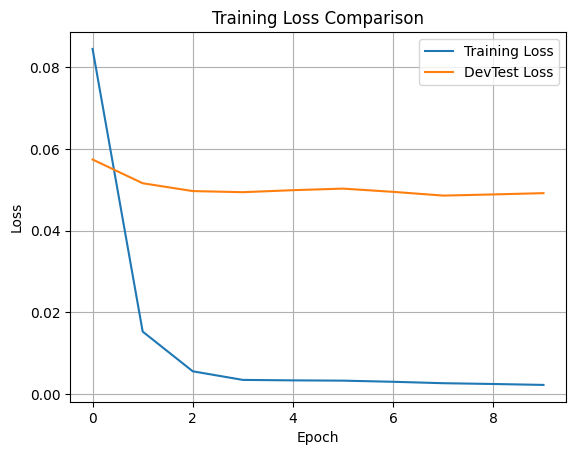

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(train_losses, label='Training Loss')
plt.plot(dev_losses, label='DevTest Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()

## Task 3 (10 marks): Transformer-Based Sentence Classification (PyTorch)

* Preprocess input as: question [SEP] answer, pad to a fixed length (justify your choice of length).

* Use a suitable tokenizer (justify your choice).

* Build a Transformer model in PyTorch:

    * Embedding layer (size 128) + positional embeddings.

    * One Transformer encoder layer (hidden dim in {64, 128, 256}, 4 attention heads).

    * One hidden layer (256 units, ReLU).

    * Use suitable final layer for classification
    
  
* Apply Global Average Pooling to the output sequence of the Transformer encoder layer.
  
* Use an appropriate loss function (e.g., CrossEntropyLoss).

* Train and evaluate on the test split.

* Report best accuracy, precision, recall, F1-score, and discuss a failure case, with supporting code output.

**Mark breakdown:**

* (5 marks) Correct implementation: input preparation, tokenizer, transformer model, training setup.

* (4.5 marks) Proper evaluation: metric reporting, failure case analysis with discussion.

* (0.5 mark) Good coding style: : clean, modular code, meaningful variable names, and good comments.

<!-- * (1.5 marks) Correct input preparation and tokenizer choice (with justification).

* (2 marks) Transformer architecture implementation.

* (2 marks) Training setup, loss function, and optimizer.

* (2 marks) Evaluation and correct metric reporting.

* (2 marks) Failure case analysis and suggestions.

* (0.5 mark) For good coding style: clean, modular code, meaningful variable names, and good comments. -->


In [13]:
#   Write your code and answers here. You can add more code and markdown cells if needed.

# Submission

Your submission should consist of this Jupyter notebook with all your code and explanations inserted into the notebook as text cells. **The notebook should contain the output of the runs. All code should run. Code with syntax errors or code without output will not be assessed.**

**Do not submit multiple files.**

Examine the text cells of this notebook so that you can have an idea of how to format text for good visual impact. You can also read this useful [guide to the MarkDown notation](https://daringfireball.net/projects/markdown/syntax),  which explains the format of the text cells.

### Marking Rubric

| Criteria                          | Unsatisfactory | Pass           | Credit         | Distinction     |
|----------------------------------|----------------|----------------|----------------|-----------------|
| **Task 1 – Correctness**         | 0 points       | 1 point        | 1.5 points     | 2 points        |
| **Task 1 – Evaluation & Discussion** | 0 points   | 0.75 points    | 1 point        | 1.5 points      |
| **Task 1 – Code Readability**    | 0 points       | 0.25 points    | 0.4 points     | 0.5 points      |
| **Task 2 – Correctness**         | 0 points       | 1.5 points     | 2.5 points     | 3 points        |
| **Task 2 – Evaluation & Analysis** | 0 points     | 1.25 points    | 2 points       | 2.5 points      |
| **Task 2 – Code Readability**    | 0 points       | 0.25 points    | 0.4 points     | 0.5 points      |
| **Task 3 – Correctness**         | 0 points       | 2.5 points     | 4 points       | 5 points        |
| **Task 3 – Evaluation & Analysis** | 0 points     | 2.25 points    | 3.5 points     | 4.5 points      |
| **Task 3 – Code Readability**    | 0 points       | 0.25 points    | 0.4 points     | 0.5 points      |


### Assessment Criteria Description

The following aspects will be considered when marking each task. The total score is based on the level of achievement across these dimensions.

#### Correctness
How well the main functionality and requirements of the task are implemented.

- **Unsatisfactory** – Major components are missing or incorrect.
- **Pass** – Some core components are correctly implemented.
- **Credit** – Most components are correctly implemented with minor issues.
- **Distinction** – All required components are correctly and completely implemented.

#### Evaluation & Analysis (where applicable)
The quality of evaluation metrics, observations, and insights into the model’s performance.

- **Unsatisfactory** – Minimal or no evaluation and discussion.
- **Pass** – Basic evaluation is provided, but analysis is shallow.
- **Credit** – Good evaluation with meaningful discussion.
- **Distinction** – In-depth, insightful analysis and thoughtful observations.

#### Code Readability
Clarity, structure, and quality of code writing style.

- **Unsatisfactory** – Code is difficult to read, poorly structured, and lacks clarity (e.g., meaningless variable names, no comments).
- **Pass** – Code is generally readable with some good practices.
- **Credit** – Code is clearly readable and mostly well-structured.
- **Distinction** – Code is clean, well-organized, and easy to follow; shows excellent style and best practices.
